In [39]:
# Import as bibliotecas
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

IMAGEM = 'lena_color_512.tif'

In [40]:
# 1 - Carregar images

# img = cv2.imread(IMAGEM, cv2.IMREAD_GRAYSCALE)
img = cv2.imread('mountain-small.png', cv2.IMREAD_GRAYSCALE)

In [41]:
img

array([[212, 212, 212, ..., 212, 212, 212],
       [212, 212, 212, ..., 212, 212, 212],
       [212, 212, 212, ..., 212, 212, 212],
       ...,
       [151, 151, 151, ..., 135, 135, 135],
       [151, 151, 151, ..., 135, 135, 135],
       [151, 151, 151, ..., 135, 135, 135]], dtype=uint8)

In [42]:
# 2 - Definir o filtro
# Parâmetros:
# - Tamanho
# - Tipo

TIPO = 'laplaciano'
TAMANHO = 3
OFFSET = int(TAMANHO/2)

kernel = np.zeros((TAMANHO, TAMANHO))
if TIPO == 'media':
    kernel[:,:] = 1/(TAMANHO*TAMANHO)
elif TIPO == 'laplaciano':
    kernel[:,:] = -1
    kernel[OFFSET, OFFSET] = 1*((TAMANHO*TAMANHO) - 1)
elif TIPO == 'sobel':
    kernel = np.array([[-1, -2, -1], [0,0,0], [1,2,1]])
#     kernel[OFFSET, OFFSET] = 1*((TAMANHO*TAMANHO) - 1)

In [43]:
# 3 - Realizar convolução
# - Caluclar offset
# Adicionar zeros
img_buffer = np.zeros((img.shape[0] + 2*OFFSET, img.shape[1] + 2*OFFSET))
img_buffer[OFFSET:img.shape[0] + OFFSET, OFFSET:img.shape[1] + OFFSET] = img

In [44]:
# Convolução
img_float = np.zeros(img_buffer.shape)
for i in range(0+OFFSET, img_buffer.shape[0] - OFFSET):
    for j in range(0+OFFSET, img_buffer.shape[1] - OFFSET):
        resultado = kernel * img_buffer[i - OFFSET:i+OFFSET+1, j-OFFSET:j+OFFSET+1]
        img_float[i,j] = resultado.sum()
#         img_buffer[u,j] = resultado.sum()
        

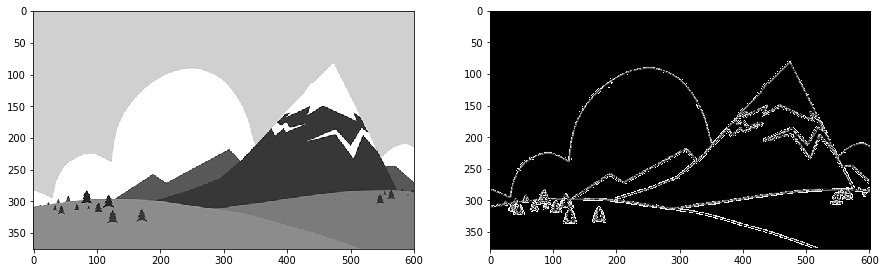

In [48]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(img, 'gray')
plt.subplot(1,2,2)
plt.imshow(np.uint8(img_float), 'gray')

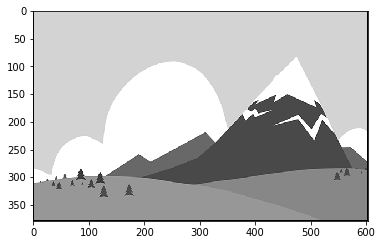

In [28]:
plt.imshow(img_buffer, 'gray')

# How to plot

In [70]:
x = np.random.rand(256)

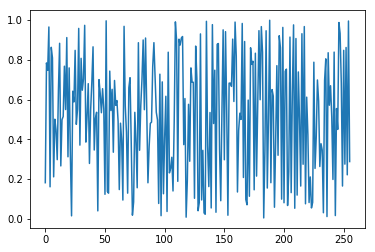

In [71]:
plt.plot(x)